In [1]:
import os
import platform
from copy import deepcopy

import torch
from lavis.models import load_model_and_preprocess
from transformers.generation import GenerationConfig
from transformers.trainer_utils import set_seed

from functools import partial
from PIL import Image

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [2]:
checkpoint_path = "lavis/output/pp_14b/sft/global_step296/unfreeze_llm_model.pth"

In [3]:
load_model_and_preprocess = partial(load_model_and_preprocess,is_eval=True,device="cuda")
llm_device_map="auto"
model, vis_processors, _ = load_model_and_preprocess("minigpt4qwen", "qwen14b_chat",llm_device_map=llm_device_map)
model.load_checkpoint(checkpoint_path)
# llm_state_dict = model.llm_model.state_dict()

generation_config = {
    "chat_format": "chatml",
    "eos_token_id": 151643,
    "pad_token_id": 151643,
    "max_window_size": 6144,
    "max_new_tokens": 512,
    "do_sample": False,
    "transformers_version": "4.31.0"
}

generation_config = GenerationConfig.from_dict(generation_config)

seed = 42

Finishing Initializing Vision-Encoder...
Finishing Loading Q-former Initializing Config...
Finishing Initializing Q-former...
Loading LLM:/root/autodl-tmp/MiniGPT4Qwen/lavis/../cache/ckpt/Qwen-14B-Chat...


Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

Freeze LLM...
Start loading pretrained model: /root/autodl-tmp/MiniGPT4Qwen/lavis/../cache/ckpt/blip2/blip2_pretrained_flant5xxl.pth
Loading the File Named: /root/autodl-tmp/MiniGPT4Qwen/lavis/../cache/ckpt/blip2/blip2_pretrained_flant5xxl.pth...
Checkpoint: lavis/output/pp_14b/sft/global_step296/unfreeze_llm_model.pth


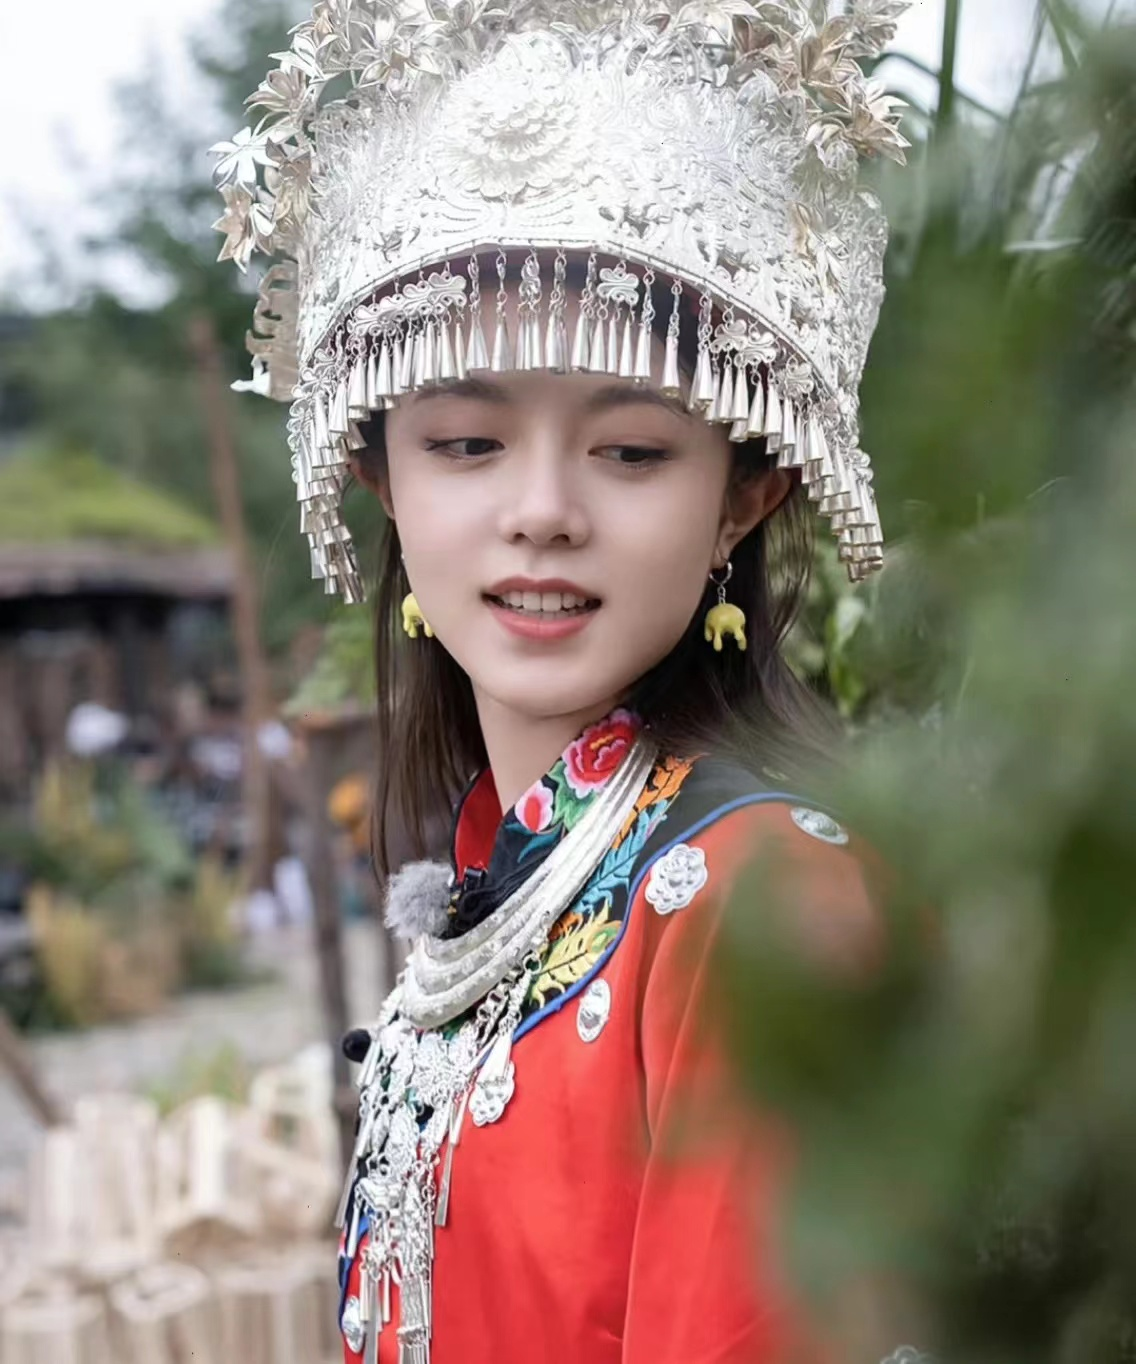

In [4]:
image_path = "./examples/zjm.jpg"
image = Image.open(image_path).convert("RGB")

query = "<Img><ImageHere></Img> 用简短一句话描述这幅图片"

image_tensor = vis_processors['eval'](image).unsqueeze(dim=0).cuda()

image

In [5]:
history, response = [], ''
with torch.cuda.amp.autocast(enabled=True,dtype=torch.bfloat16):
    response, history = model.chat(query, history=history, image_tensor=image_tensor, generation_config=generation_config)

print(response)
print(history)

198
画面中，一名身着传统服装的年轻女子站在一棵大树前，周围是五颜六色的花朵。她头戴一顶华丽的帽子，上面有珠子和流苏，显得格外引人注目。女子面带微笑，似乎很享受。  背景中还有几个人，有的离前景较近，有的则较远。画面中还可以看到几只鸟，一只靠近画面左侧，另一只在画面右侧。
[('<Img><ImageHere></Img> 用简短一句话描述这幅图片', '画面中，一名身着传统服装的年轻女子站在一棵大树前，周围是五颜六色的花朵。她头戴一顶华丽的帽子，上面有珠子和流苏，显得格外引人注目。女子面带微笑，似乎很享受。  背景中还有几个人，有的离前景较近，有的则较远。画面中还可以看到几只鸟，一只靠近画面左侧，另一只在画面右侧。')]
